Copyright (c) 2023, Troy Phat Tran (Mr. Troy).<br>
The Malaria dataset available on the official National Institutes of Health (NIH) website is in the public domain and<br>
does not have any specific license nor copyright restrictions.

Binary (2-classes) image classification<br>
Dataset: Malaria.<br>
Direct link: https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip (~350 Megabytes)

This dataset comprises 2 classes namely Parasitized and Uninfected, and it is not split into training and test sets<br>
yet. The images' resolutions are varied.<br>
Create a classifier for the given dataset. The required input shape must be 40x40x3 (RGB images).

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

In [7]:
import os
import zipfile
from urllib.request import urlretrieve

In [12]:
from keras import Sequential
from keras.models import load_model
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from matplotlib import pyplot as plt

In [16]:
def binary_model():
    # Define a data folder to extract our compressed dataset to
    data_folder = 'cell_images/'

    # Download and extract the dataset if not existing
    if not os.path.exists(data_folder):
        dataset_url = 'https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip'
        local_zip = 'cell_images.zip'
        urlretrieve(url=dataset_url, filename=local_zip)
        zip_ref = zipfile.ZipFile(file=local_zip, mode='r')
        zip_ref.extractall()
        zip_ref.close()

    # Define image size and batch size
    img_size = (40, 40)  # ADD CODE HERE: just update the image size here to match the requirement
    batch_size = 32

    # Create the training dataset. The dataset is not split into training and validation sets yet
    train_ds = image_dataset_from_directory(
        directory=data_folder,
        validation_split=0.2,
        subset='training',
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )

    # Create the validation dataset
    val_ds = image_dataset_from_directory(
        directory=data_folder,
        validation_split=0.2,
        subset='validation',
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )

    # Define the model architecture
    model = Sequential([
        tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_size[0], img_size[1], 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define the early stopping callback for val_accuracy
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1, min_delta=0.01)

    # Show the model architecture (optional)
    summarize_model(model)

    # Train the model with early stopping callback
    history = model.fit(x=train_ds, validation_data=val_ds, epochs=20, callbacks=[early_stopping])
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss'),
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model

===============DO NOT EDIT THIS PART================================

In [17]:
def summarize_model(model):
    model.summary()
    input_shape = model.layers[0].input_shape
    print(f'Input shape: {input_shape}')

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 40, 40, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                

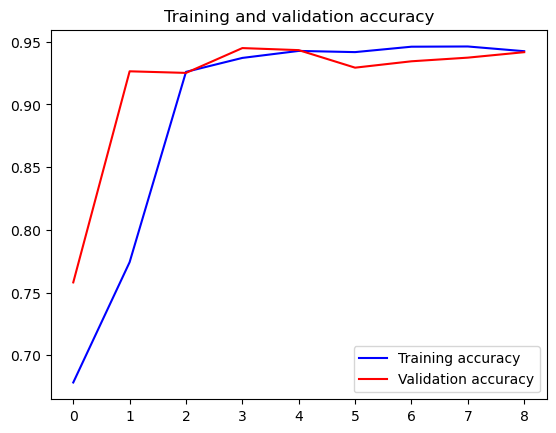

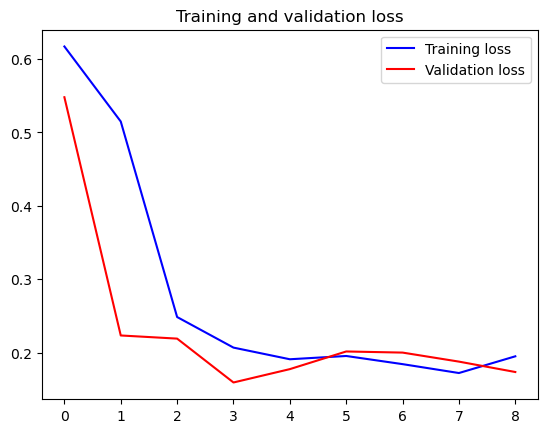

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 40, 40, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

In [18]:
if __name__ == '__main__':
    # Run and save your model
    my_model = binary_model()
    filepath = "binary_rgb_model.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)
    summarize_model(saved_model)